## Análise das vendas de produtos no Wish - Solução

Você foi contratado por uma empresa que planeja revender produtos no Wish. Seu objetivo vai ser ajudá-los a entender que fatores são os mais importantes para definir o sucesso de determinados produtos dentro da plataforma. Utilize as ferramentas estudadas até aqui para tirar insights e auxiliar a empresa do ponto de vista estratégico.

https://www.kaggle.com/datasets/jmmvutu/summer-products-and-sales-in-ecommerce-wish


### Perguntas possíveis

- Produtos com maior discrepância entre preço real e de retail vendem mais?
- Ad boost aumentam as vendas?
- Avaliações melhores aumentam vendas?
- Badges importam?
- Quantidade de tags auxiliam vendas?
- Tags com maiores vendas?
- Tempo de existência do produto
- Shipping analysis
- Todos os produtos contém fotos?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

filterwarnings("ignore")
plt.style.use("default")

In [2]:
df_products = pd.read_csv(
    "data/summer-products-with-rating-and-performance_2020-08.csv"
)
df_products.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [3]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [4]:
cols = [
    "title",
    "price",
    "retail_price",
    "currency_buyer",
    "units_sold",
    "uses_ad_boosts",
    "rating",
    "rating_count",
    "badges_count",
    "badge_product_quality",
    "badge_fast_shipping",
    "tags",
    "product_color",
    "product_variation_size_id",
    "product_variation_inventory",
    "shipping_is_express",
    "countries_shipped_to",
    "inventory_total",
    "has_urgency_banner",
    "origin_country",
    "merchant_rating_count",
    "merchant_rating",
]

## 1. Análise da qualidade dos dados


In [5]:
df_products = df_products[cols]

In [6]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        1573 non-null   object 
 1   price                        1573 non-null   float64
 2   retail_price                 1573 non-null   int64  
 3   currency_buyer               1573 non-null   object 
 4   units_sold                   1573 non-null   int64  
 5   uses_ad_boosts               1573 non-null   int64  
 6   rating                       1573 non-null   float64
 7   rating_count                 1573 non-null   int64  
 8   badges_count                 1573 non-null   int64  
 9   badge_product_quality        1573 non-null   int64  
 10  badge_fast_shipping          1573 non-null   int64  
 11  tags                         1573 non-null   object 
 12  product_color                1532 non-null   object 
 13  product_variation_

### 1.1. Análise de dados ausentes


In [7]:
df_products.isna().sum()

title                             0
price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    41
product_variation_size_id        14
product_variation_inventory       0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner             1100
origin_country                   17
merchant_rating_count             0
merchant_rating                   0
dtype: int64

As colunas "product_color", "product_variation_size_id", "has_urgency_banner" e "origin_country" possuem dados problemáticos.


In [8]:
df_products.loc[df_products["product_color"].isna(), "product_color"] = ""
df_products.loc[
    df_products["product_variation_size_id"].isna(), "product_variation_size_id"
] = ""
df_products.loc[df_products["has_urgency_banner"].isna(), "has_urgency_banner"] = 0
df_products.loc[df_products["origin_country"].isna(), "origin_country"] = ""

In [9]:
df_products.isna().sum()

title                          0
price                          0
retail_price                   0
currency_buyer                 0
units_sold                     0
uses_ad_boosts                 0
rating                         0
rating_count                   0
badges_count                   0
badge_product_quality          0
badge_fast_shipping            0
tags                           0
product_color                  0
product_variation_size_id      0
product_variation_inventory    0
shipping_is_express            0
countries_shipped_to           0
inventory_total                0
has_urgency_banner             0
origin_country                 0
merchant_rating_count          0
merchant_rating                0
dtype: int64

### 1.2. Qual das colunas são categóricas e quais são numéricas?


In [10]:
df_products.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1.573000e+03,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,0.105531,0.074380,0.012715,33.081373,0.002543,40.456453,49.821360,0.300699,2.649583e+04,4.032345
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,0.340709,0.262472,0.112075,21.353137,0.050379,20.301203,2.562799,0.458708,7.847446e+04,0.204768
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,1.000000,0.000000,0.000000e+00,2.333333
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,0.000000,0.000000,0.000000,6.000000,0.000000,31.000000,50.000000,0.000000,1.987000e+03,3.917353
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,0.000000,0.000000,0.000000,50.000000,0.000000,40.000000,50.000000,0.000000,7.936000e+03,4.040650
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,0.000000,0.000000,0.000000,50.000000,0.000000,43.000000,50.000000,1.000000,2.456400e+04,4.161797
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,3.000000,1.000000,1.000000,50.000000,1.000000,140.000000,50.000000,1.000000,2.174765e+06,5.000000


In [11]:
categorical_cols = [i for i in cols if i not in df_products.describe().columns]
numerical_cols = df_products.describe().columns
categorical_cols

['title',
 'currency_buyer',
 'tags',
 'product_color',
 'product_variation_size_id',
 'origin_country']

In [12]:
numerical_cols

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_product_quality',
       'badge_fast_shipping', 'product_variation_inventory',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'has_urgency_banner', 'merchant_rating_count', 'merchant_rating'],
      dtype='object')

## 2. Análise exploratória dos dados


### 2.1. Análise de distribuição dos dados


#### 2.1.1 Dados categóricos


In [13]:
categorical_cols

['title',
 'currency_buyer',
 'tags',
 'product_color',
 'product_variation_size_id',
 'origin_country']

In [14]:
df_products["tags"]  # Esta precisará de um tratamento

0       Summer,Fashion,womenunderwearsuit,printedpajam...
1       Mini,womens dresses,Summer,Patchwork,fashion d...
2       Summer,cardigan,women beachwear,chiffon,Sexy w...
3       Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...
4       Summer,Plus Size,Lace,Casual pants,Bottom,pant...
                              ...                        
1568    bohemia,Plus Size,dandelionfloralprinted,short...
1569    Summer,Panties,Elastic,Lace,Casual pants,casua...
1570    runningshort,Beach Shorts,beachpant,menbeachsh...
1571    Summer,fashion women,Fashion,Lace,Dresses,Dres...
1572    Summer,Leggings,slim,Yoga,pants,Slim Fit,Women...
Name: tags, Length: 1573, dtype: object

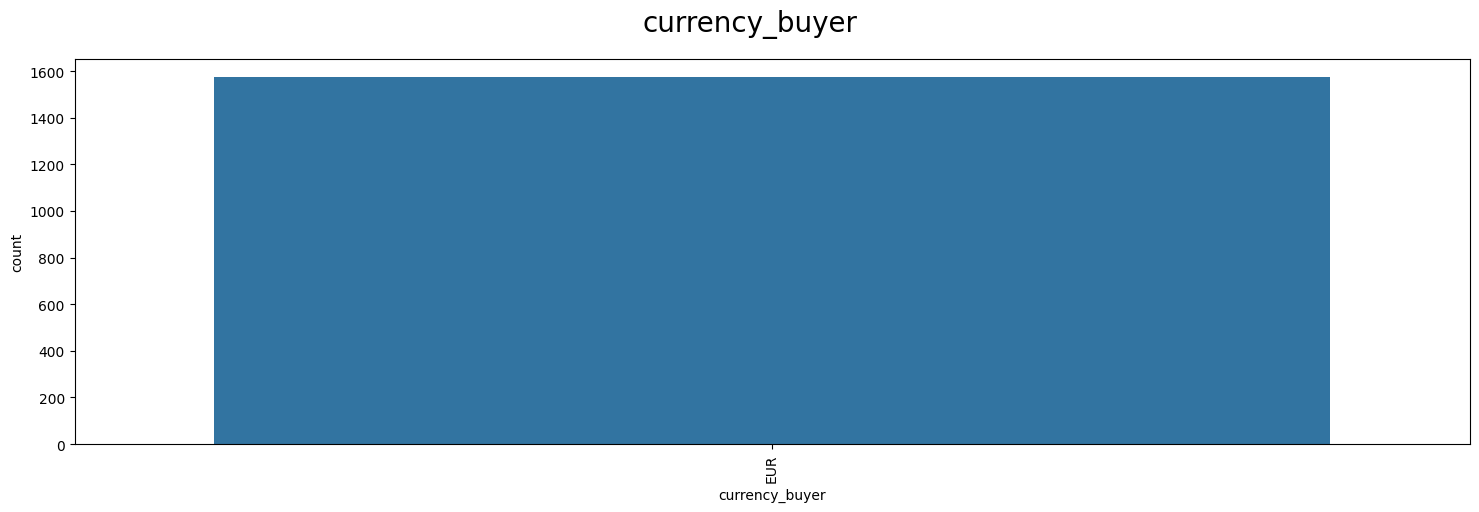

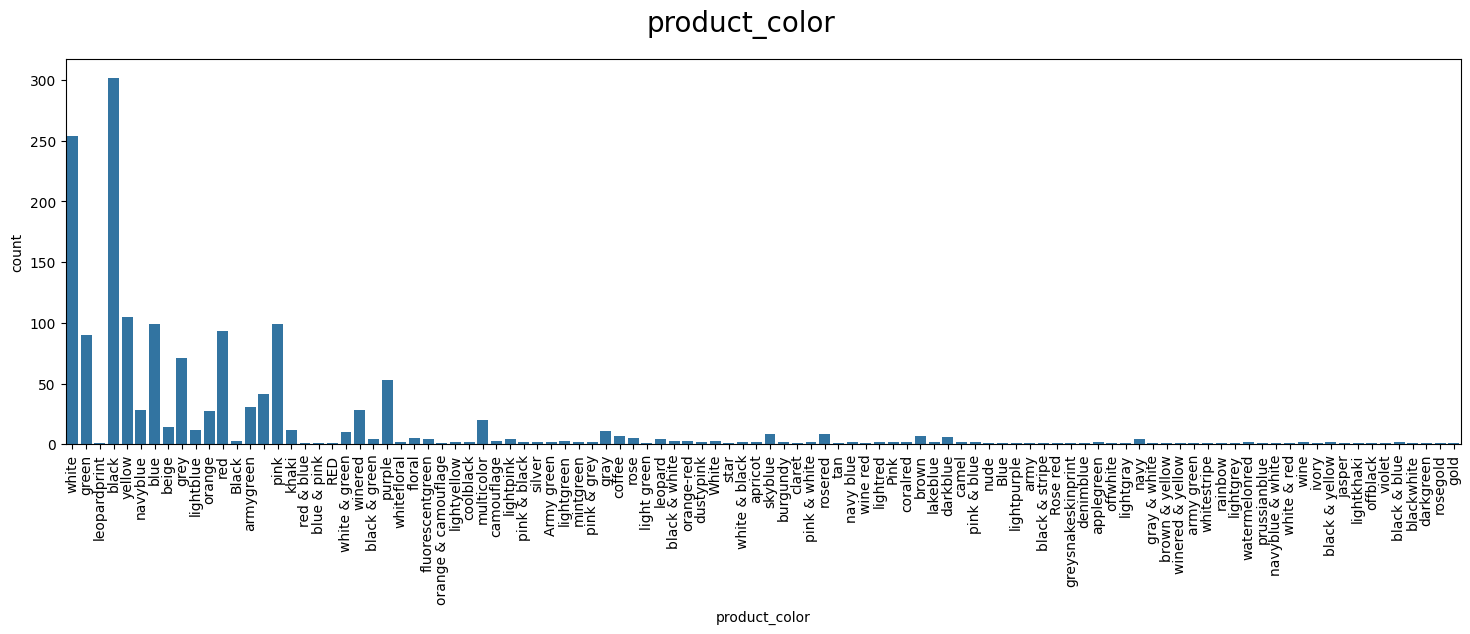

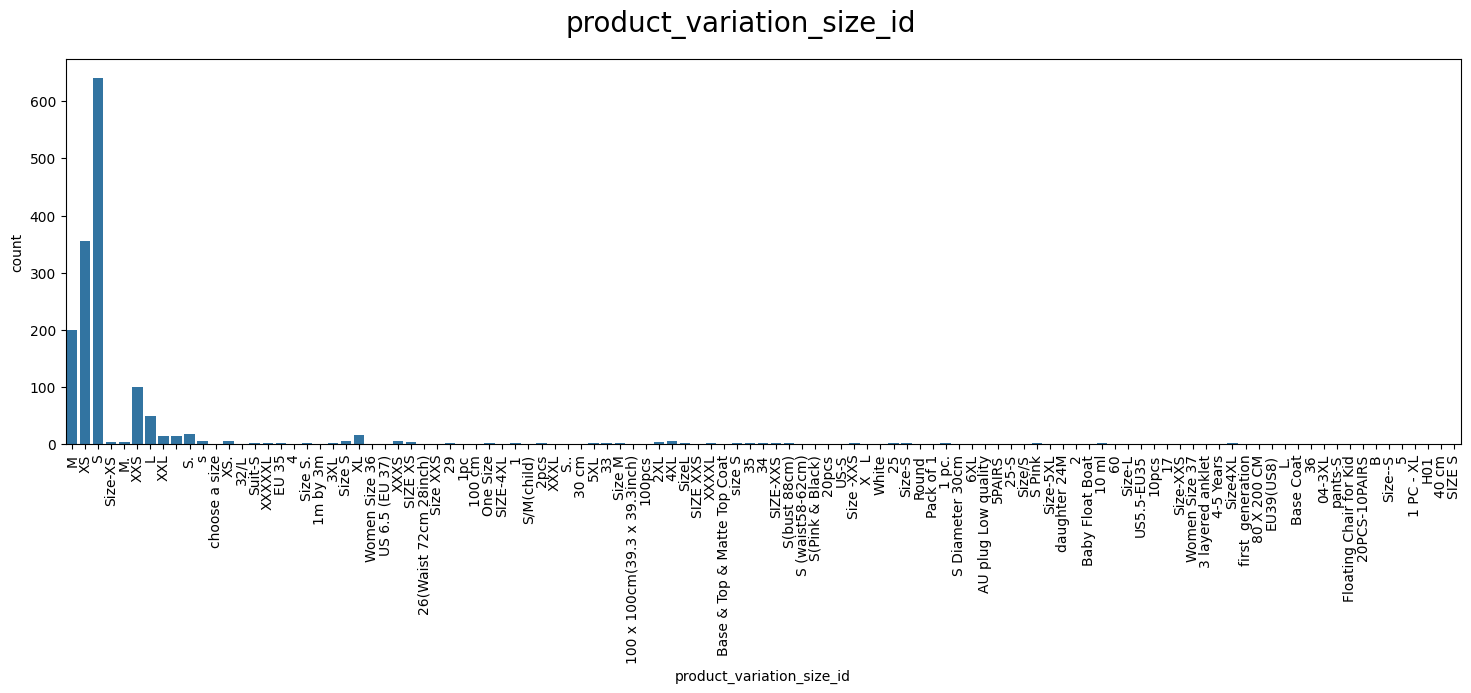

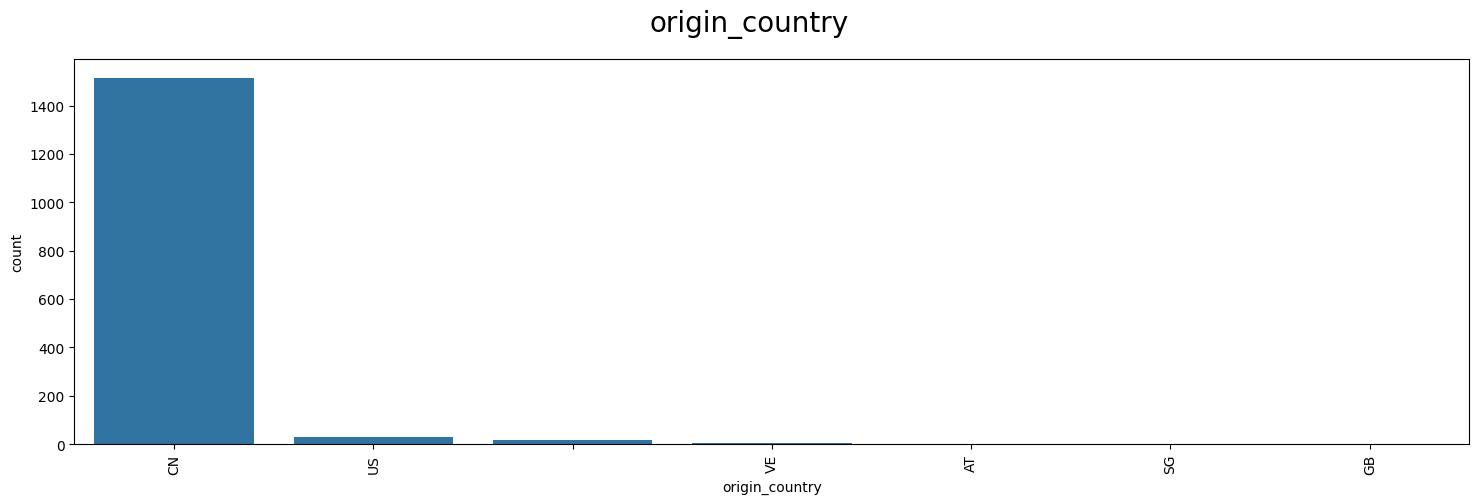

In [15]:
for col in categorical_cols:
    if col not in ["title", "tags"]:
        f, axes = plt.subplots(1, 1, figsize=(18, 5))
        sns.countplot(x=col, data=df_products)
        plt.xticks(rotation=90)
        plt.suptitle(col, fontsize=20)
        plt.show()

#### 2.1.2. Dados numéricos


In [16]:
numerical_cols

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_product_quality',
       'badge_fast_shipping', 'product_variation_inventory',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'has_urgency_banner', 'merchant_rating_count', 'merchant_rating'],
      dtype='object')

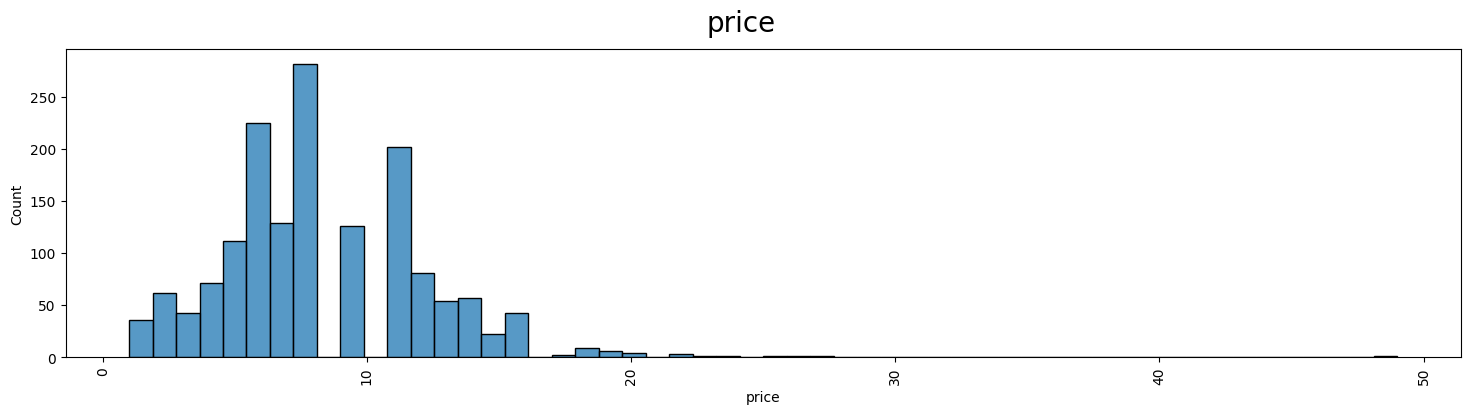

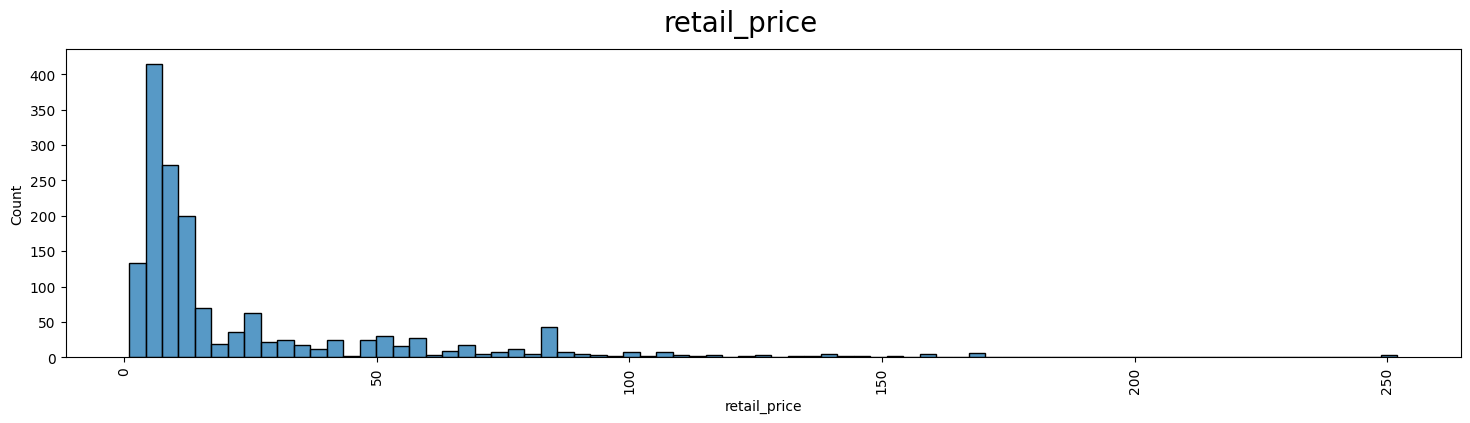

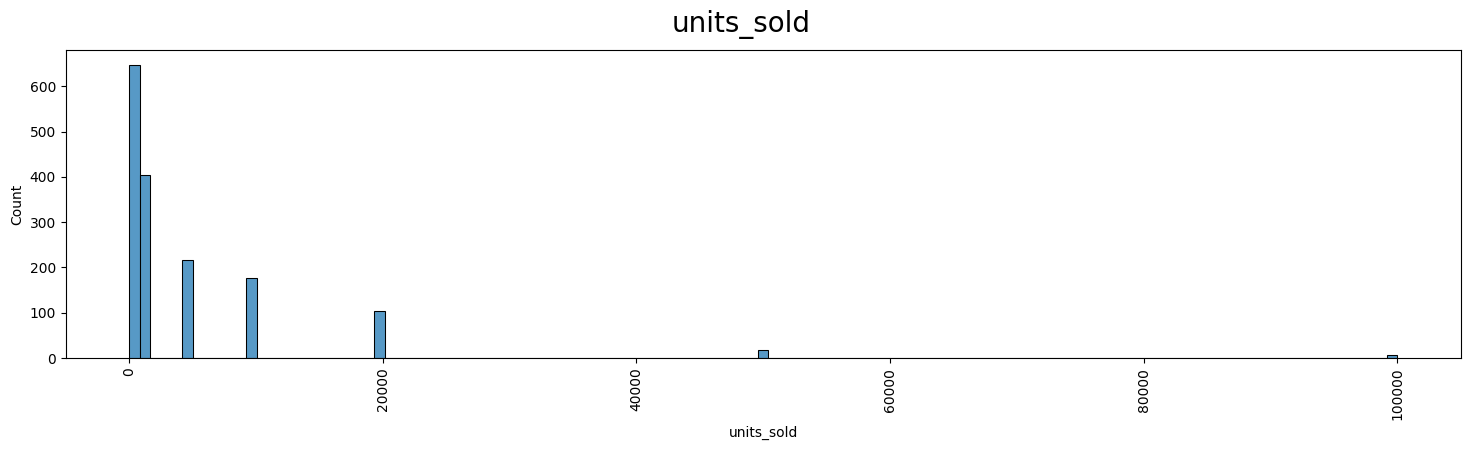

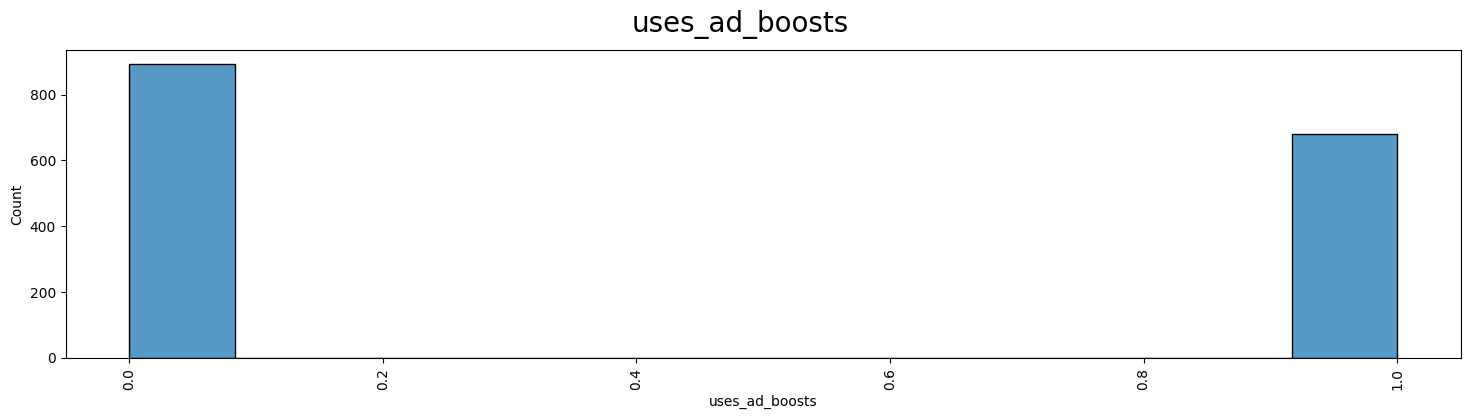

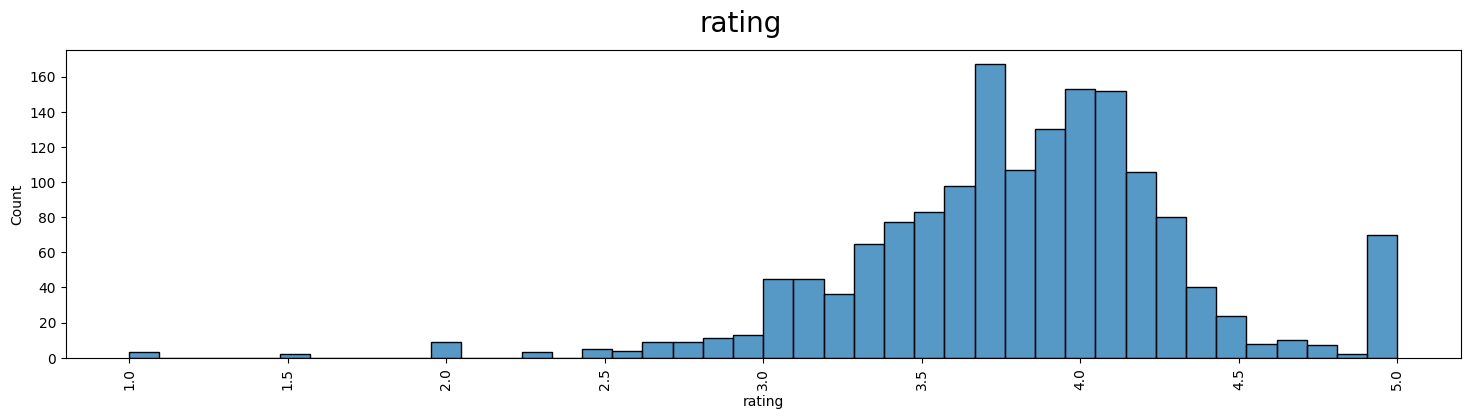

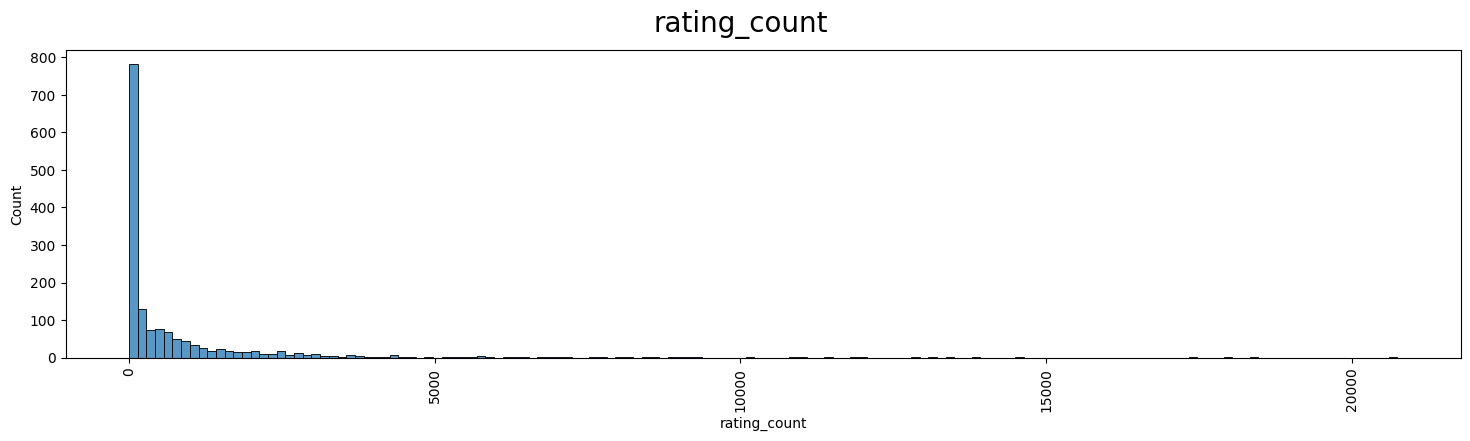

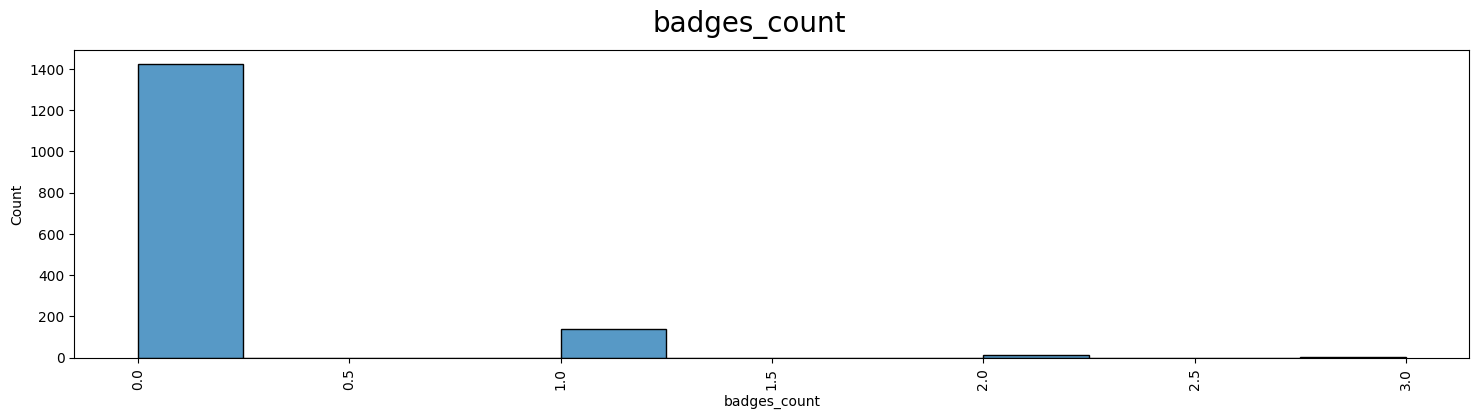

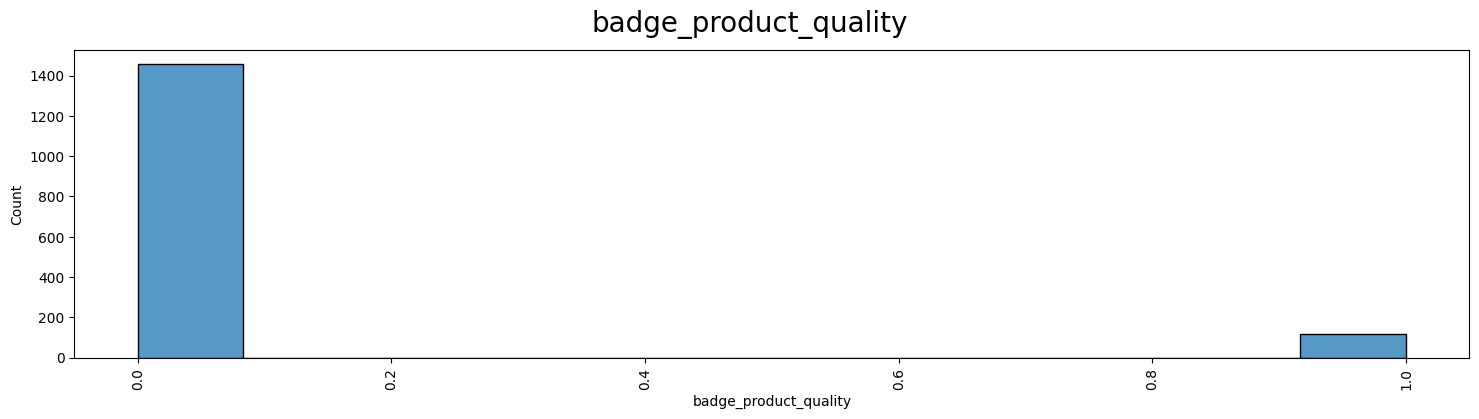

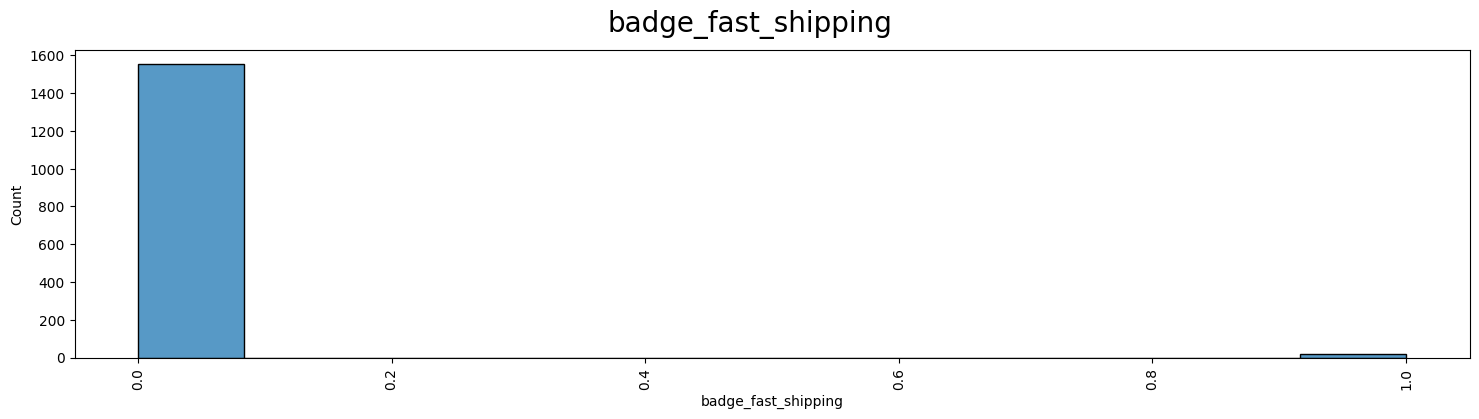

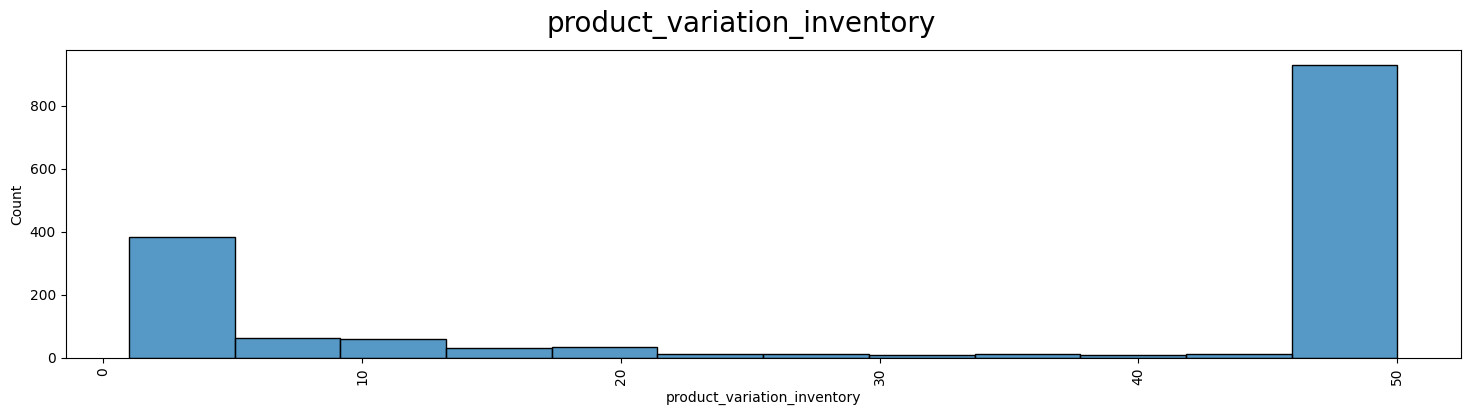

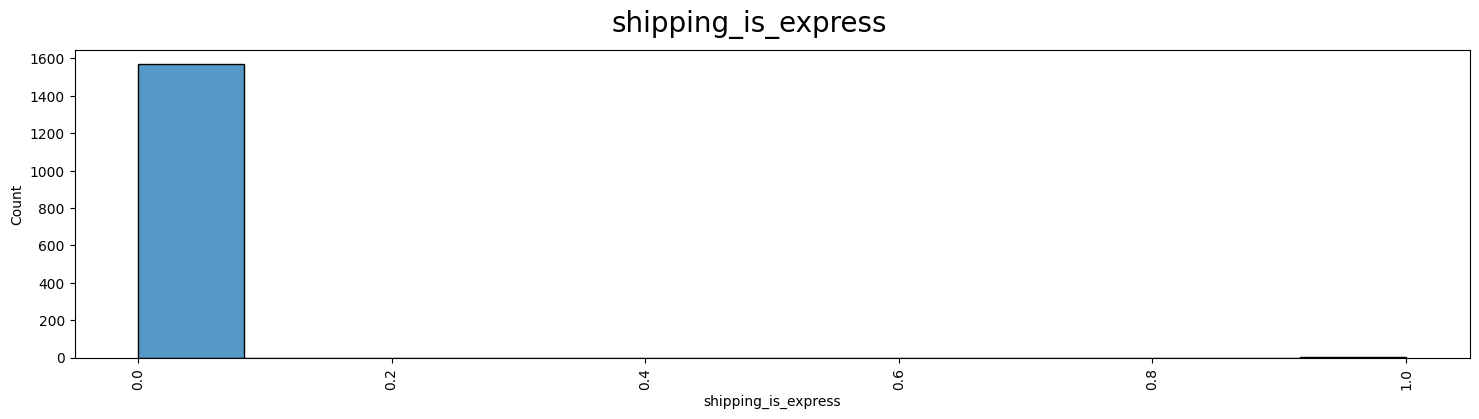

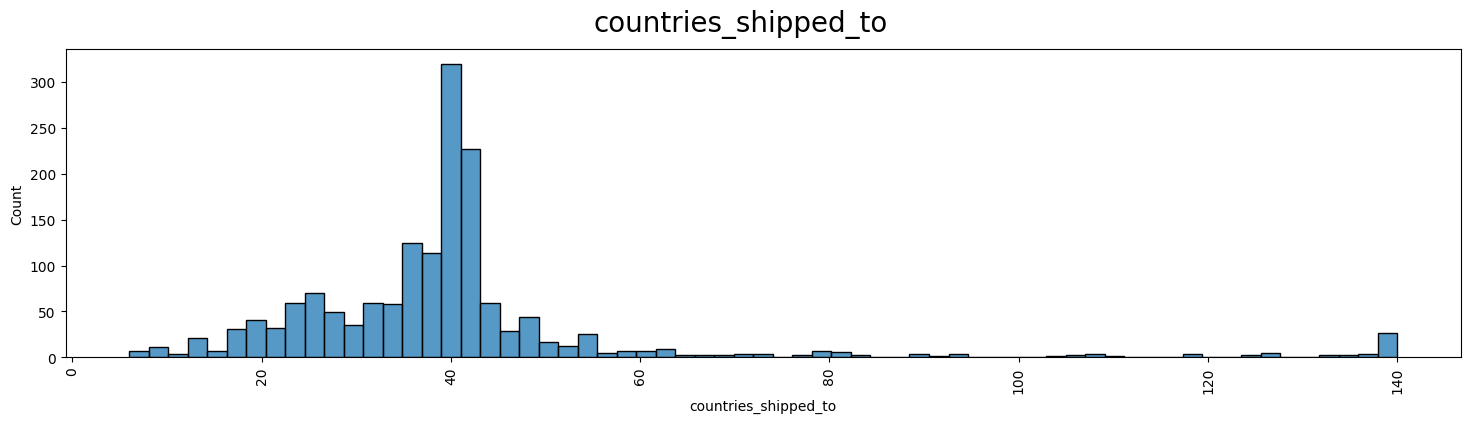

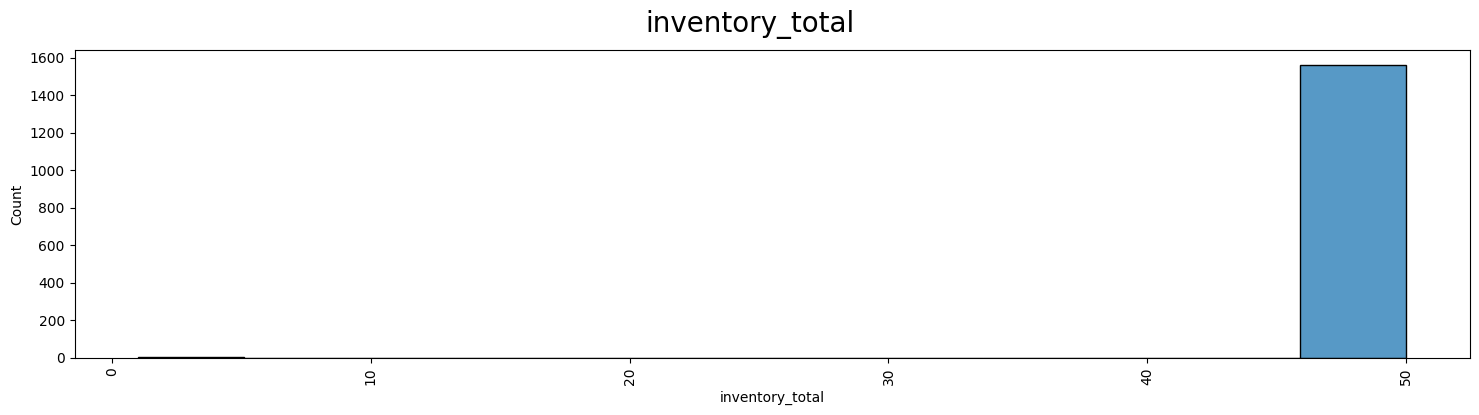

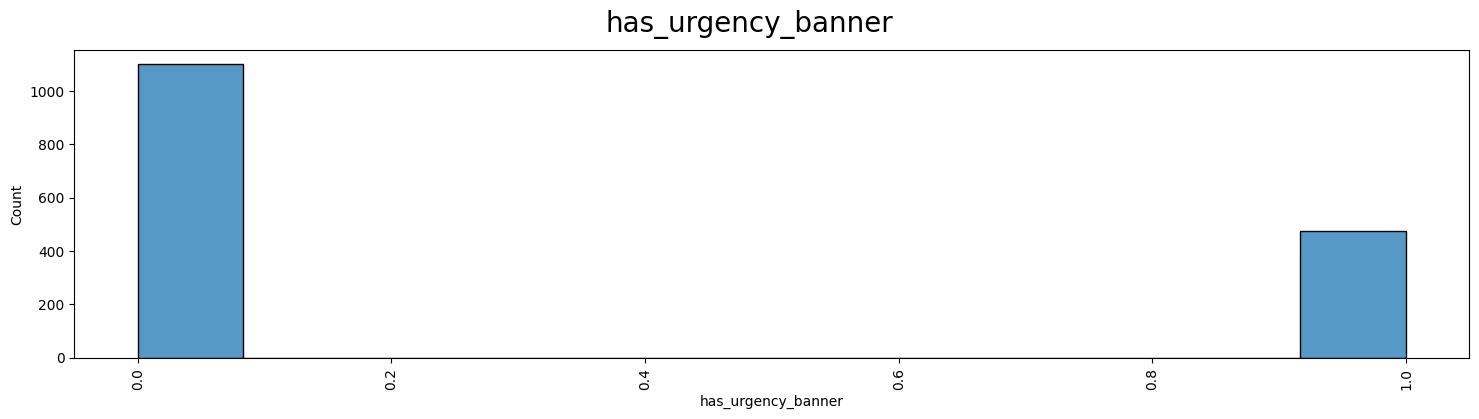

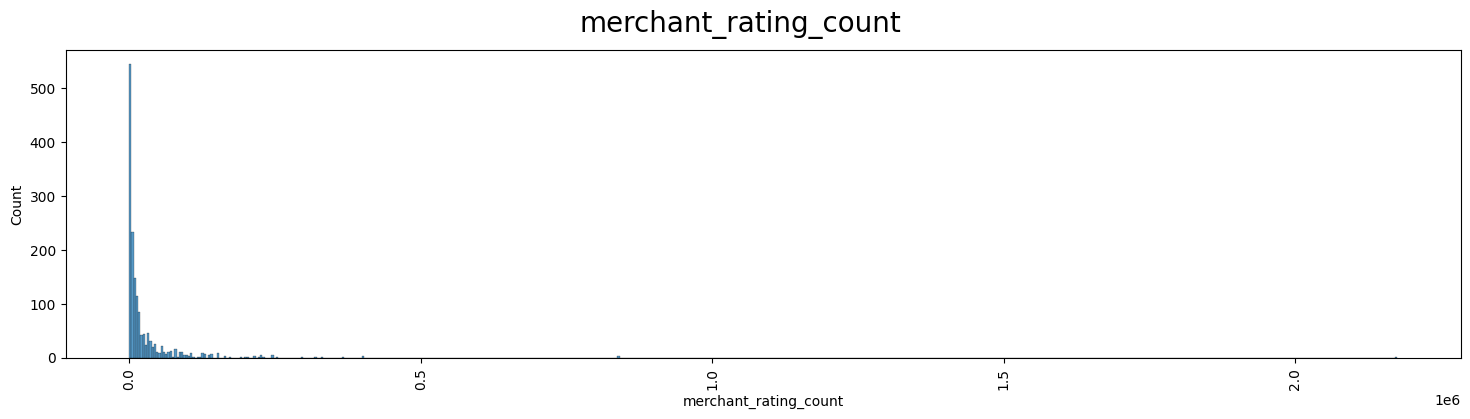

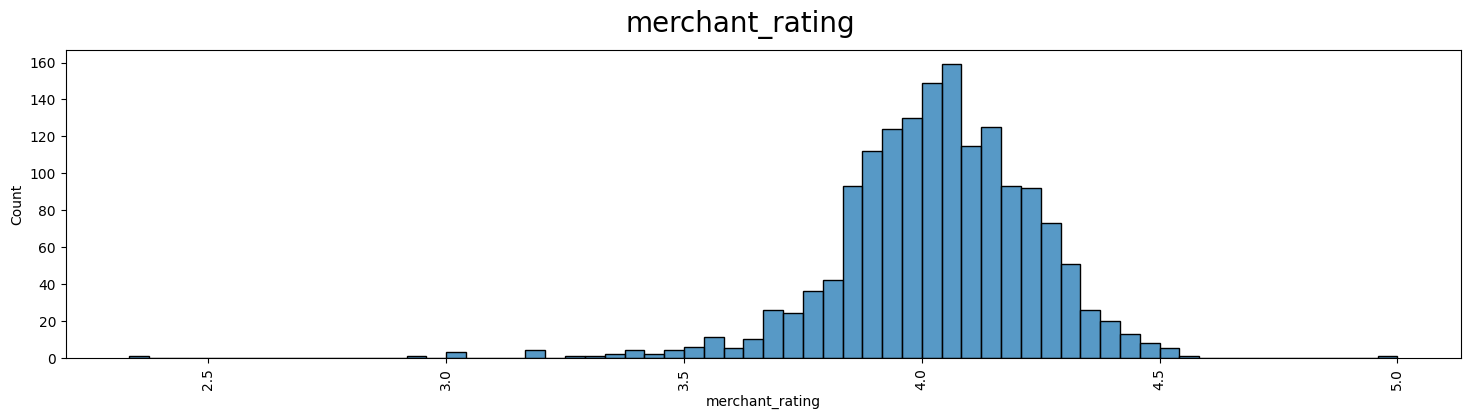

In [17]:
for col in numerical_cols:
    f, axes = plt.subplots(1, 1, figsize=(18, 4))
    sns.histplot(x=col, data=df_products)
    plt.xticks(rotation=90)
    plt.suptitle(col, fontsize=20)
    plt.show()

A coluna "units_sold" precisará de uma correção, pois não é contínua


#### 2.1.3. Ajuste fino das colunas "tag" e "units sold"


**Units_sold**


In [18]:
df_products["units_sold"].value_counts()

units_sold
100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         49
50000      17
100000      6
8           4
1           3
7           2
2           2
3           2
6           1
Name: count, dtype: int64

In [19]:
df_products

,title,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,...,product_color,product_variation_size_id,product_variation_inventory,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,0,0,...,white,M,50,0,34,50,1.0,CN,568,4.128521
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.00,22,EUR,20000,1,3.45,6135,0,0,...,green,XS,50,0,41,50,1.0,CN,17752,3.899673
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,8.00,43,EUR,100,0,3.57,14,0,0,...,leopardprint,XS,1,0,36,50,1.0,CN,295,3.989831
3,Hot Summer Cool T-shirt pour les femmes Mode T...,8.00,8,EUR,5000,1,4.03,579,0,0,...,black,M,50,0,41,50,0.0,CN,23832,4.020435
4,Femmes Shorts d'été à lacets taille élastique ...,2.72,3,EUR,100,1,3.10,20,0,0,...,yellow,S,1,0,35,50,1.0,CN,14482,4.001588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,6.00,9,EUR,10000,1,4.08,1367,0,0,...,navyblue,S,50,0,41,50,0.0,CN,5316,4.224605
1569,10 couleurs femmes shorts d'été lacent ceintur...,2.00,56,EUR,100,1,3.07,28,0,0,...,lightblue,S,2,0,26,50,1.0,CN,4435,3.696054
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,5.00,19,EUR,100,0,3.71,59,0,0,...,white,SIZE S,15,0,11,50,0.0,CN,210,3.961905
1571,Mode femmes d'été sans manches robes col en V ...,13.00,11,EUR,100,0,2.50,2,0,0,...,white,Size S.,36,0,29,50,0.0,CN,31,3.774194


In [20]:
df_products.loc[df_products["units_sold"] < 10, "units_sold"] = 10
df_products["units_sold"].value_counts()

units_sold
100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         63
50000      17
100000      6
Name: count, dtype: int64

In [21]:
df_products["units_sold"].median()

1000.0

In [22]:
df_products["units_sold"].mean()

4339.052765416402

Como a mediana das vendas é 1000, vamos tentar entender que produtos ficaram acima desse patamar e quais ficaram abaixo.


**Tag**


In [23]:
from wordcloud import WordCloud, STOPWORDS

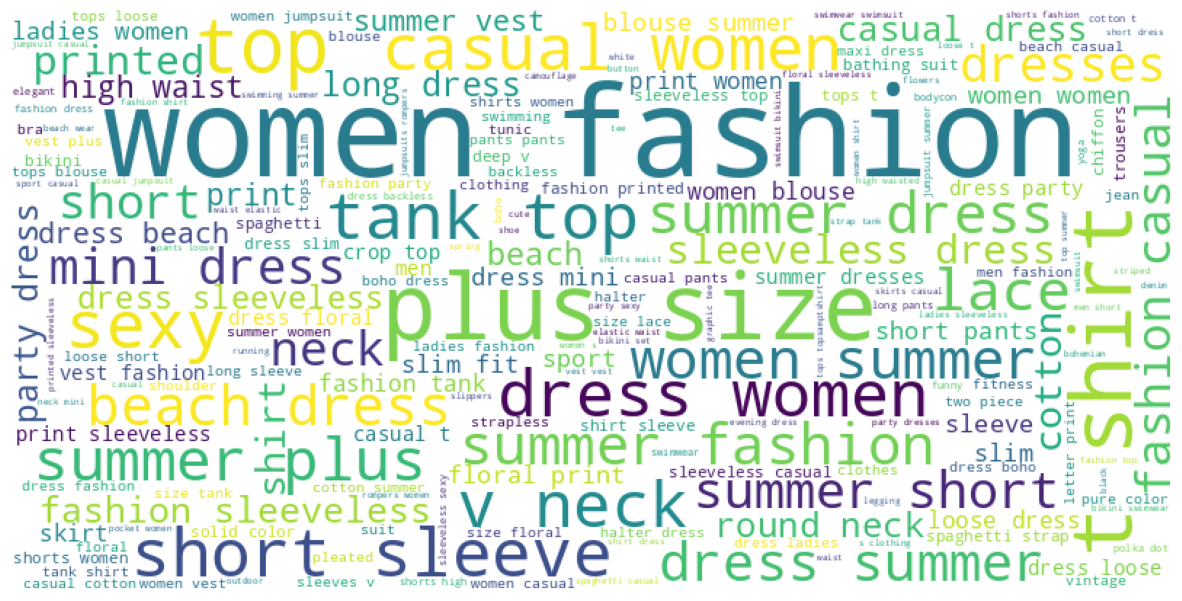

In [24]:
import matplotlib.pyplot as plt

word_string = " ".join(df_products["tags"].str.lower())
wordcloud = WordCloud(
    stopwords=STOPWORDS, background_color="white", width=800, height=400
).generate(word_string)

plt.subplots(figsize=(15, 15))
plt.clf()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 2.2. Análise de produtos "campeões"


In [25]:
df_products["income"] = df_products["price"] * df_products["units_sold"]

<Axes: xlabel='income', ylabel='Density'>

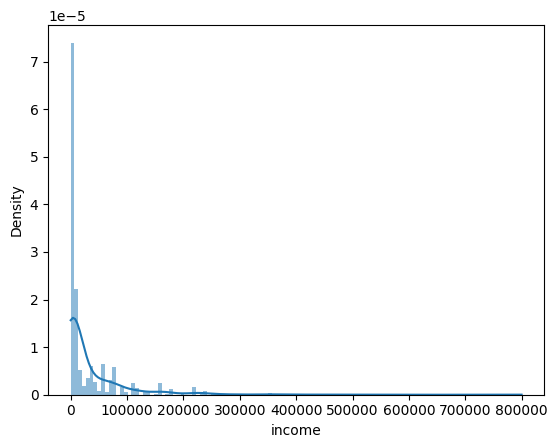

In [26]:
sns.histplot(x=df_products["income"], kde=True, stat="density", linewidth=0)

### Analise de produtos "campeões"
O gráfico de distribuição do faturamento dos produtos ("income") mostra que a maioria dos produtos no Wish gera baixo faturamento, enquanto poucos produtos concentram a maior parte das vendas. A distribuição é bastante assimétrica (com cauda longa à direita), indicando que poucos itens são responsáveis por grandes receitas, enquanto a maioria vende pouco. Isso evidencia um padrão típico de mercado online, onde o sucesso está concentrado em poucos produtos campeões, sugerindo que identificar esses produtos é fundamental para maximizar os resultados na plataforma.

In [27]:
import numpy as np

for i in np.linspace(0, 1, 10):
    print("{:.2f} - {:.2f}".format(i, df_products["income"].quantile(i)))

0.00 - 20.00
0.11 - 369.00
0.22 - 700.00
0.33 - 1100.00
0.44 - 5000.00
0.56 - 8000.00
0.67 - 16000.00
0.78 - 49800.00
0.89 - 90000.00
1.00 - 800000.00


In [28]:
df_products["income"].median()

7000.0

In [29]:
df_products["income"].mean()

35211.941703750796

Repare a diferença entre a média e a mediana quando a distribuição da variável observada não segue uma normal. Nestes casos, vale a pena basearmos nossas análises na mediana.

Vamos tentar estudar os produtos com faturamento superior a $7.000.


In [30]:
df_products["success"] = 0
df_products.loc[df_products["income"] > 7000, "success"] = 1

#### Produtos com maior diferença entre "retail_price" e "price" vendem mais?**


In [31]:
df_products.columns

Index(['title', 'price', 'retail_price', 'currency_buyer', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'has_urgency_banner', 'origin_country', 'merchant_rating_count',
       'merchant_rating', 'income', 'success'],
      dtype='object')

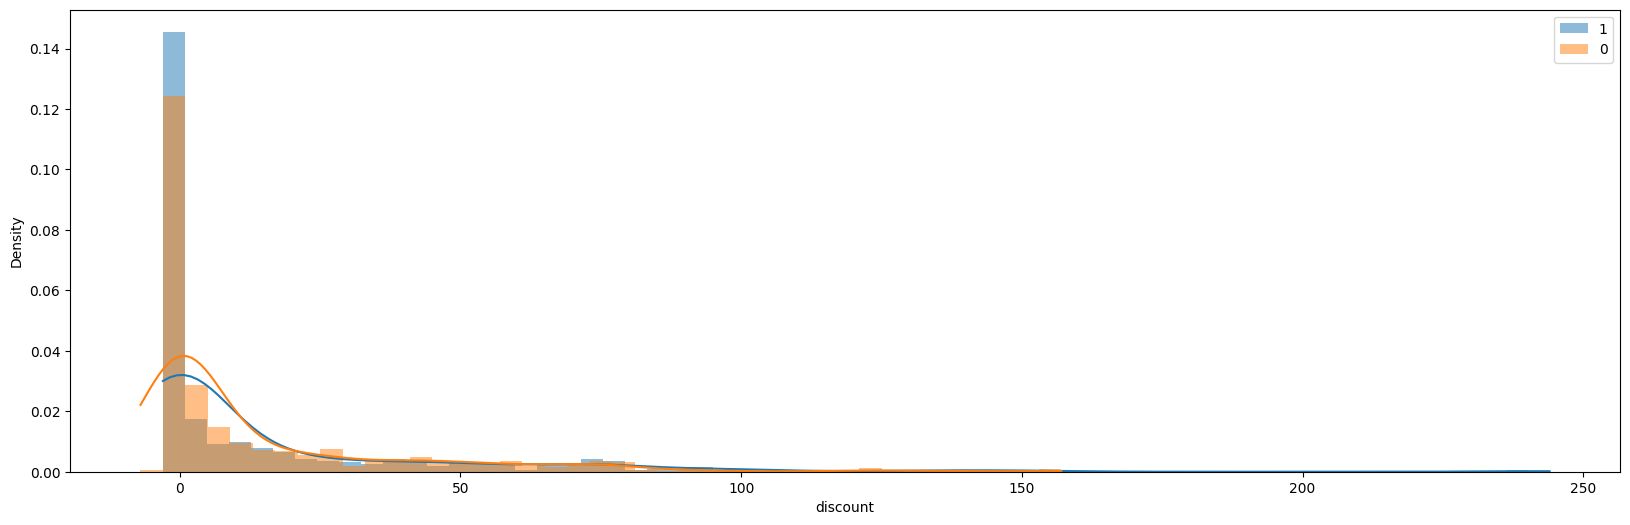

In [32]:
df_products["discount"] = df_products["retail_price"] - df_products["price"]

fig, ax = plt.subplots(figsize=(20, 6))
sns.histplot(
    x=df_products.loc[df_products["success"] == 1, "discount"],
    label="1",
    kde=True,
    stat="density",
    linewidth=0,
)
sns.histplot(
    x=df_products.loc[df_products["success"] == 0, "discount"],
    label="0",
    kde=True,
    stat="density",
    linewidth=0,
)
plt.legend()

### Analise dos descontos
O gráfico compara a distribuição dos descontos (diferença entre preço de varejo e preço real) para produtos de sucesso e insucesso. Observa-se que produtos campeões de vendas tendem a apresentar descontos maiores, com o pico da curva dos produtos de sucesso deslocado para valores mais altos de desconto. Já os produtos menos vendidos concentram-se em descontos menores. Isso sugere que oferecer descontos mais expressivos está associado a um maior sucesso de vendas na plataforma.

#### Ad boost aumentam as vendas?


In [33]:
df_products.head(1)

,title,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,...,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,income,success,discount
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,0,0,...,0,34,50,1.0,CN,568,4.128521,1600.0,0,-2.0


In [34]:
df_products.loc[df_products["success"] == 0, "uses_ad_boosts"].value_counts()

uses_ad_boosts
0    441
1    368
Name: count, dtype: int64

In [35]:
df_products.loc[df_products["success"] == 1, "uses_ad_boosts"].value_counts()

uses_ad_boosts
0    451
1    313
Name: count, dtype: int64

#### Avaliações melhores aumentam vendas?


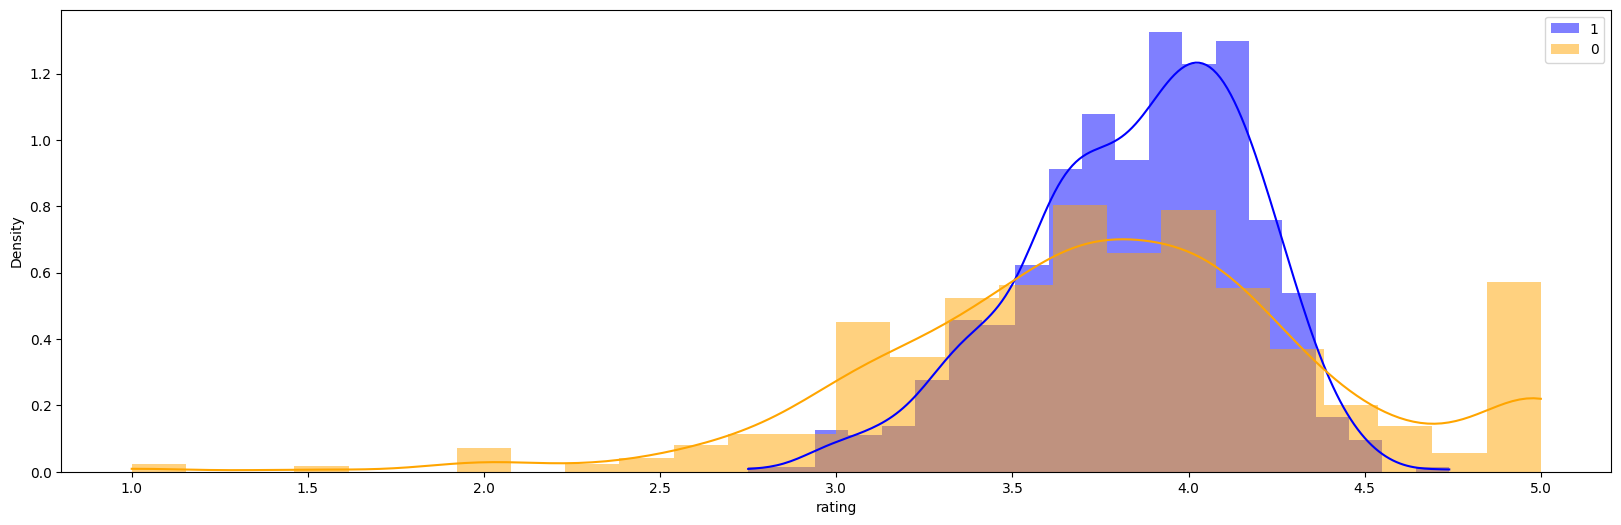

In [36]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.histplot(
    x=df_products.loc[df_products["success"] == 1, "rating"],
    label="1",
    color="blue",
    kde=True,
    stat="density",
    linewidth=0,
)
sns.histplot(
    x=df_products.loc[df_products["success"] == 0, "rating"],
    label="0",
    color="orange",
    kde=True,
    stat="density",
    linewidth=0,
)
plt.legend()

### Analise do aumentamento das vendas por avaliações
O gráfico mostra a distribuição das avaliações (ratings) para produtos de sucesso e insucesso. Nota-se que produtos campeões de vendas (curva azul) tendem a ter avaliações mais altas, com a curva deslocada para a direita em relação aos produtos menos vendidos (curva laranja). Isso indica que avaliações melhores estão associadas a um maior sucesso de vendas, sugerindo que consumidores valorizam produtos bem avaliados na plataforma.

#### Badges importam?


In [37]:
df_products.groupby(["success", "badges_count"]).count()[["title"]].pivot_table(
    index="success", columns="badges_count"
).fillna(0)

title                
badges_count      0     1    2    3
success                            
0             753.0  48.0  8.0  0.0
1             669.0  90.0  3.0  2.0

In [38]:
df_products.groupby(["success", "badge_product_quality"]).count()[
    ["title"]
].pivot_table(index="success", columns="badge_product_quality").fillna(0)

title      
badge_product_quality      0     1
success                           
0                      770.0  39.0
1                      686.0  78.0

In [39]:
df_products.groupby(["success", "badge_fast_shipping"]).count()[["title"]].pivot_table(
    index="success", columns="badge_fast_shipping"
).fillna(0)

title      
badge_fast_shipping      0     1
success                         
0                    795.0  14.0
1                    758.0   6.0

#### Quantidade de tags auxiliam vendas?


In [40]:
df_products["tags_count"] = df_products["tags"].apply(lambda x: len(x.split(",")))

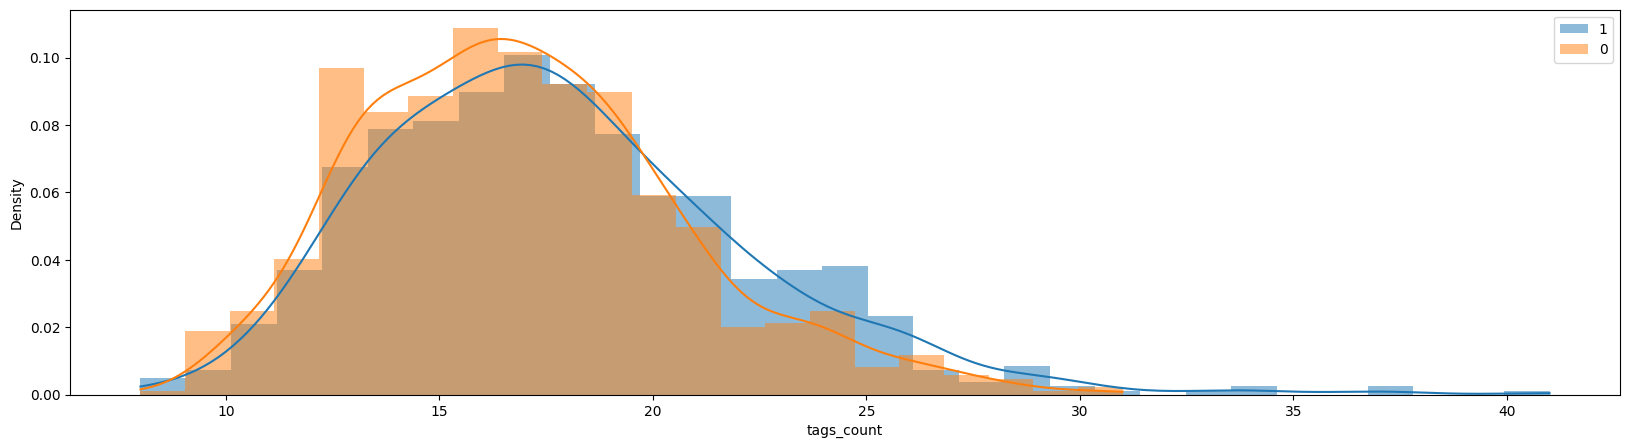

In [41]:
df_products["discount"] = df_products["retail_price"] - df_products["price"]

fig, ax = plt.subplots(figsize=(20, 5))
sns.histplot(
    x=df_products.loc[df_products["success"] == 1, "tags_count"],
    label="1",
    kde=True,
    stat="density",
    linewidth=0,
)
sns.histplot(
    x=df_products.loc[df_products["success"] == 0, "tags_count"],
    label="0",
    kde=True,
    stat="density",
    linewidth=0,
)
plt.legend()

### Analise da quantidade de tags
O gráfico compara a quantidade de tags entre produtos de sucesso e insucesso. Observa-se que produtos campeões de vendas tendem a ter, em média, mais tags associadas, enquanto produtos menos vendidos concentram-se em faixas com menos tags. Isso sugere que uma maior quantidade de tags pode aumentar a visibilidade e contribuir para o sucesso nas vendas.

#### Tags com maiores vendas?


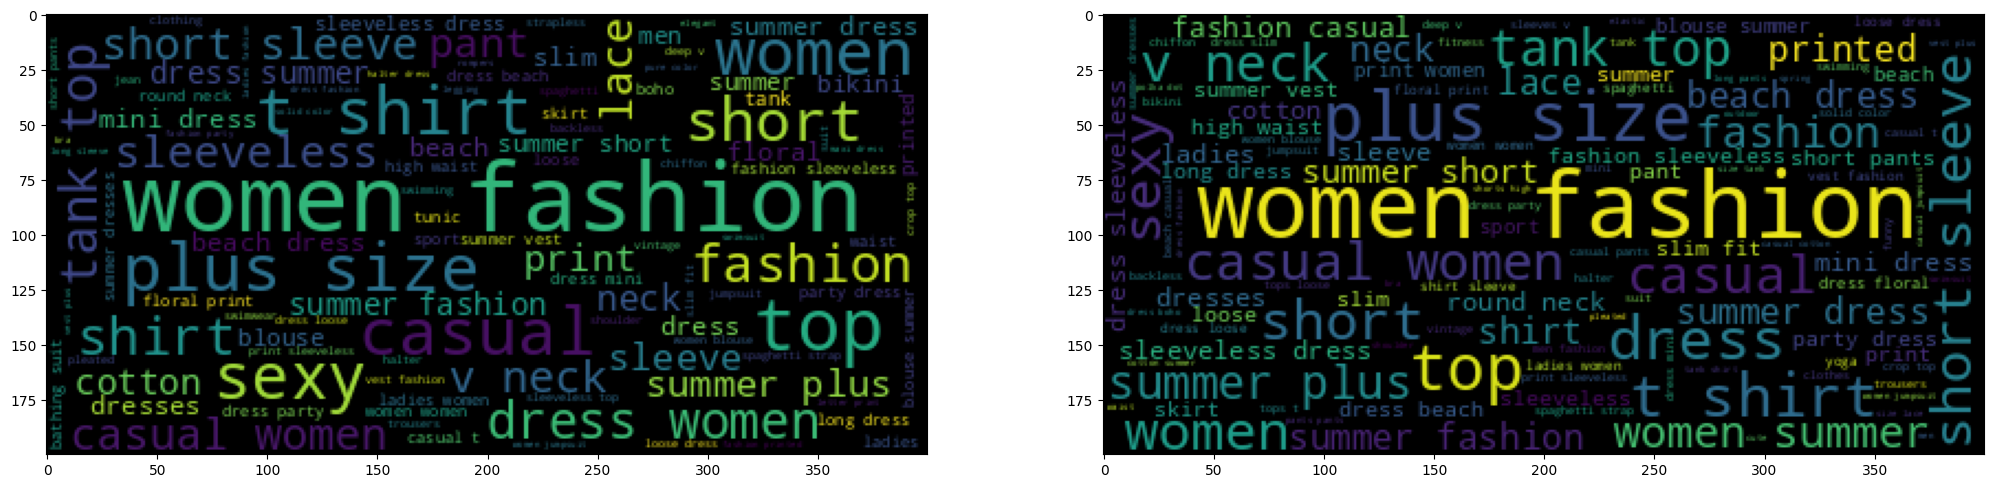

In [42]:
df_success_tags = df_products.loc[df_products["success"] == 1]
word_string = " ".join(df_success_tags["tags"].str.lower())
wordcloud_success = WordCloud(stopwords=STOPWORDS).generate(word_string)

df_fail_tags = df_products.loc[df_products["success"] == 0]
word_string = " ".join(df_fail_tags["tags"].str.lower())
wordcloud_fail = WordCloud(stopwords=STOPWORDS).generate(word_string)

fig, ax = plt.subplots(1, 2, figsize=(25, 20))
ax[0].imshow(wordcloud_success)
ax[1].imshow(wordcloud_fail)

plt.show()

**Que palavras aparecem mais nos produtos que vendem mais e menos?**


In [43]:
tags = []
for list_tags in df_success_tags["tags"].values:
    tags += list_tags.split(",")
pd.Series(tags).value_counts().head(5)

Women's Fashion    665
Summer             580
Fashion            527
Women              504
Casual             429
Name: count, dtype: int64

In [44]:
tags = []
for list_tags in df_fail_tags["tags"].values:
    tags += list_tags.split(",")
pd.Series(tags).value_counts().head(5)

Summer             741
Women's Fashion    650
Fashion            555
Casual             476
Women              457
Name: count, dtype: int64

#### Shipping analysis


In [45]:
df_products.groupby(["success", "shipping_is_express"]).count()[["title"]].pivot_table(
    index="success", columns="shipping_is_express"
).fillna(0)

title     
shipping_is_express      0    1
success                        
0                    807.0  2.0
1                    762.0  2.0

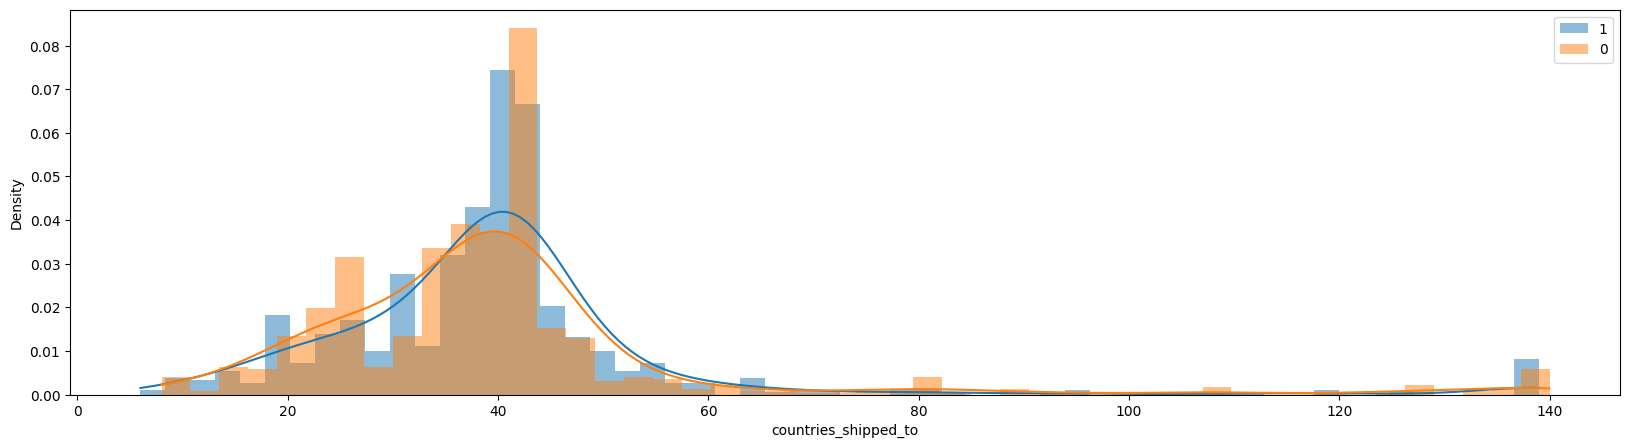

In [46]:
df_products["discount"] = df_products["retail_price"] - df_products["price"]

fig, ax = plt.subplots(figsize=(20, 5))
sns.histplot(
    x=df_products.loc[df_products["success"] == 1, "countries_shipped_to"],
    label="1",
    kde=True,
    stat="density",
    linewidth=0,
)
sns.histplot(
    x=df_products.loc[df_products["success"] == 0, "countries_shipped_to"],
    label="0",
    kde=True,
    stat="density",
    linewidth=0,
)
plt.legend()

### Análise do shipping
O gráfico evidencia que produtos de sucesso possuem, em média, uma quantidade maior de tags associadas em comparação aos produtos menos vendidos. A distribuição mostra que quanto mais tags um produto tem, maior a probabilidade de ele ser um campeão de vendas, indicando que o uso de múltiplas tags pode aumentar a visibilidade e favorecer o desempenho comercial na plataforma.

## 3. Machine Learning


In [47]:
from sklearn.model_selection import train_test_split

model_cols = [
    "price",
    "retail_price",
    "uses_ad_boosts",
    "rating",
    "badges_count",
    "badge_product_quality",
    "badge_fast_shipping",
    "product_variation_inventory",
    "shipping_is_express",
    "countries_shipped_to",
    "inventory_total",
    "has_urgency_banner",
    "merchant_rating",
    "discount",
    "tags_count",
]

x = df_products[model_cols]
y = df_products["success"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]},
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]},
]

forest_reg = RandomForestClassifier()
grid_search = GridSearchCV(
    forest_reg, param_grid, cv=5, return_train_score=True, verbose=10, n_jobs=-1
)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


,estimator,RandomForestClassifier()
,param_grid,"[{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}, {'bootstrap': [False], 'max_features': [2, 3, ...], 'n_estimators': [3, 10]}]"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,10
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,30


In [49]:
rf_model = grid_search.best_estimator_

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       253
           1       0.75      0.75      0.75       219

    accuracy                           0.77       472
   macro avg       0.77      0.77      0.77       472
weighted avg       0.77      0.77      0.77       472

[[199  54]
 [ 55 164]]


**Feature importance**


<Axes: >

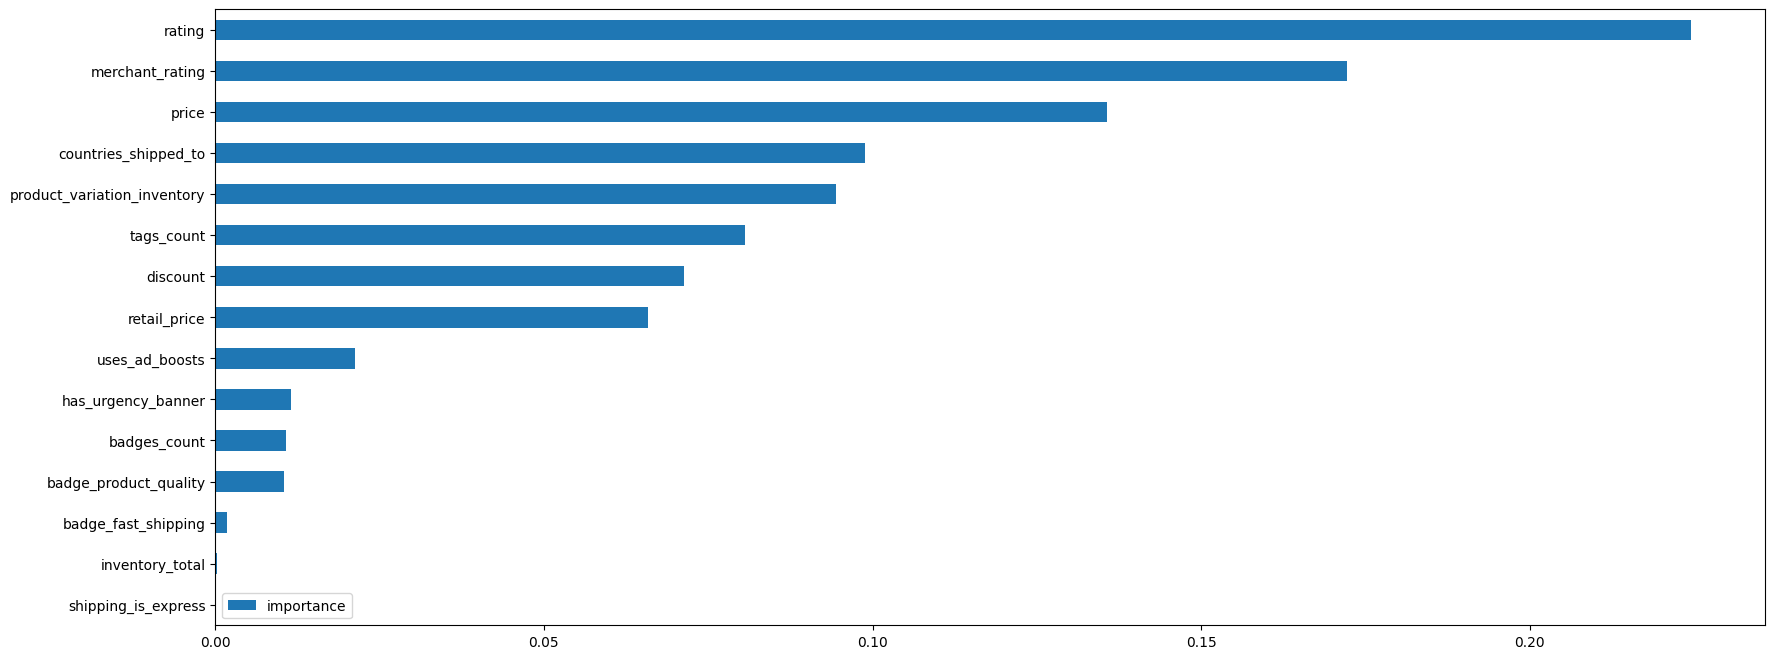

In [51]:
feature_importances = pd.DataFrame(
    rf_model.feature_importances_, index=x.columns, columns=["importance"]
).sort_values("importance", ascending=True)

fig, ax = plt.subplots(figsize=(20, 8))
feature_importances.plot(kind="barh", ax=ax)

### Importância das variáveis
O gráfico de importância das variáveis (feature importance) mostra quais fatores mais influenciam o sucesso dos produtos no Wish segundo o modelo Random Forest. Observa-se que variáveis como desconto, avaliação do produto, preço e quantidade de tags estão entre as mais relevantes para prever o sucesso nas vendas. Isso indica que estratégias focadas nesses aspectos tendem a ter maior impacto nos resultados comerciais da plataforma.

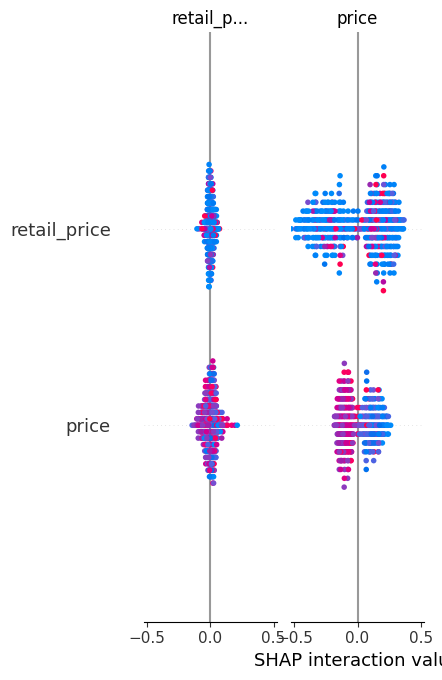

In [52]:
import shap

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(
    x_test
)  # Use x_test para evitar sobreposição de dados

# Para classificação binária, shap_values é uma lista de dois arrays
if isinstance(shap_values, list) and len(shap_values) == 2:
    # Verifica se o shape bate
    if shap_values[1].shape == x_test.shape:
        shap.summary_plot(shap_values[1], x_test)
    else:
        shap.summary_plot(shap_values, x_test)
else:
    shap.summary_plot(shap_values, x_test)

### Análise SHAP
O gráfico SHAP apresenta a contribuição de cada variável para a previsão de sucesso dos produtos pelo modelo Random Forest. Observa-se que desconto, avaliação do produto, preço e quantidade de tags são os fatores que mais impactam positivamente ou negativamente o resultado. Variáveis com maior valor absoluto de SHAP têm maior influência na decisão do modelo, indicando que estratégias focadas nesses atributos tendem a ser mais eficazes para aumentar as vendas.

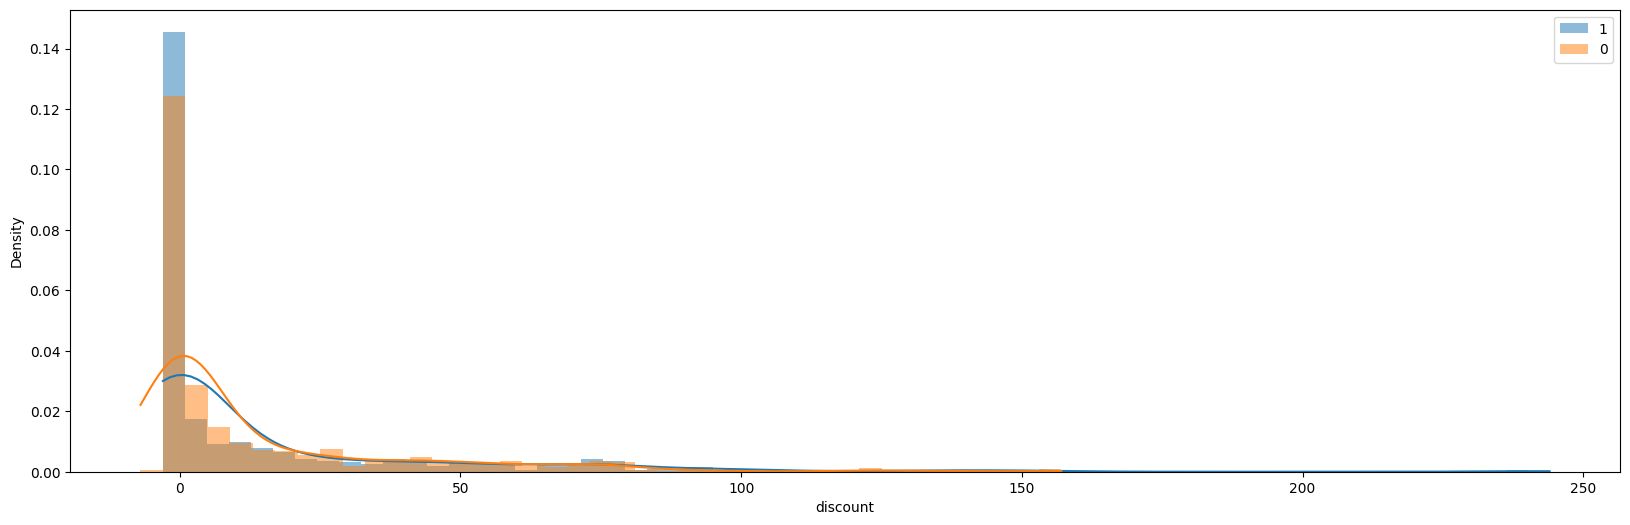

In [53]:
df_products["discount"] = df_products["retail_price"] - df_products["price"]

fig, ax = plt.subplots(figsize=(20, 6))
sns.histplot(
    x=df_products.loc[df_products["success"] == 1, "discount"],
    label="1",
    kde=True,
    stat="density",
    linewidth=0,
)
sns.histplot(
    x=df_products.loc[df_products["success"] == 0, "discount"],
    label="0",
    kde=True,
    stat="density",
    linewidth=0,
)
plt.legend()

### Análise dos descontos
O gráfico compara a distribuição dos descontos (diferença entre preço de varejo e preço real) para produtos de sucesso e insucesso. Observa-se que produtos campeões de vendas tendem a apresentar descontos maiores, com o pico da curva dos produtos de sucesso deslocado para valores mais altos de desconto. Já os produtos menos vendidos concentram-se em descontos menores. Isso sugere que oferecer descontos mais expressivos está associado a um maior sucesso de vendas na plataforma.